In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import pylab as p
import matplotlib.cm as cm


from sklearn import decomposition
from sklearn import datasets

In [12]:
birds = pd.read_csv('birds.csv')
birds.head()

,Unnamed: 0,class index,filepaths,labels,data set
0,1,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,2,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,3,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,4,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,5,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [18]:
trainID = birds.loc[:, 'data set'] == 'train' 
testID = birds.loc[:, 'data set'] == 'test' 
validateID = birds.loc[:, 'data set'] == 'valid' 

X_data_train = []
X_data_test = []
X_data_validation = []

totalPixels = 16

files_train = birds.loc[trainID, 'filepaths']
files_test = birds.loc[testID, 'filepaths']
files_valid = birds.loc[validateID, 'filepaths']
for myFile in files_test:
    image = cv2.imread(myFile)
    image = cv2.resize(image, (totalPixels, totalPixels))
    X_data_test.append(image)
for myFile in files_valid:
    image = cv2.imread(myFile)
    image = cv2.resize(image, (totalPixels, totalPixels))
    X_data_validation.append(image)
for myFile in files_train:
    image = cv2.imread(myFile)
    image = cv2.resize(image, (totalPixels, totalPixels))
    X_data_train.append(image)
print('X_data shape:', np.array(X_data_test).shape)

X_data shape: (2000, 16, 16, 3)


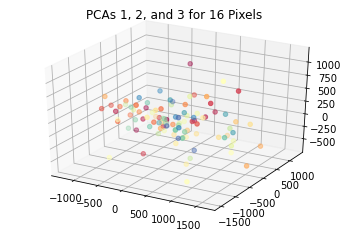

In [54]:
y = birds.loc[birds['data set'] == 'test', 'class index']
pca = np.load('testPCA16.npy')
pcaData = pd.DataFrame(pca).loc[:,0:2]

datamin=min(y)
datamax=20#max(y)
fig=p.figure()

ax3D=fig.add_subplot(111, projection='3d')
collection = ax3D.scatter(pcaData.loc[1:100, 0], pcaData.loc[1:100, 1], pcaData.loc[1:100, 2], c=y.iloc[0:100], vmin=datamin, vmax=datamax, 
                          marker='o', cmap=cm.Spectral)



p.title("PCAs 1, 2, and 3 for 16 Pixels")
plt.savefig('16PixelPCA.png')
p.show()



In [22]:
pd.DataFrame(pca).loc[:,0:2]

,0,1,2
0,-741.590772,-226.044773,-257.744335
1,163.670270,484.962306,-113.940950
2,-779.641235,360.110046,14.696027
3,-893.447907,196.711650,-399.053707
4,-73.059622,-86.274941,51.012339
...,...,...,...
1995,433.980902,-501.755828,207.180525
1996,-1233.947887,-695.934395,-177.930188
1997,-1215.304765,-654.026930,-162.207869
1998,599.619899,-406.315266,-224.207774
